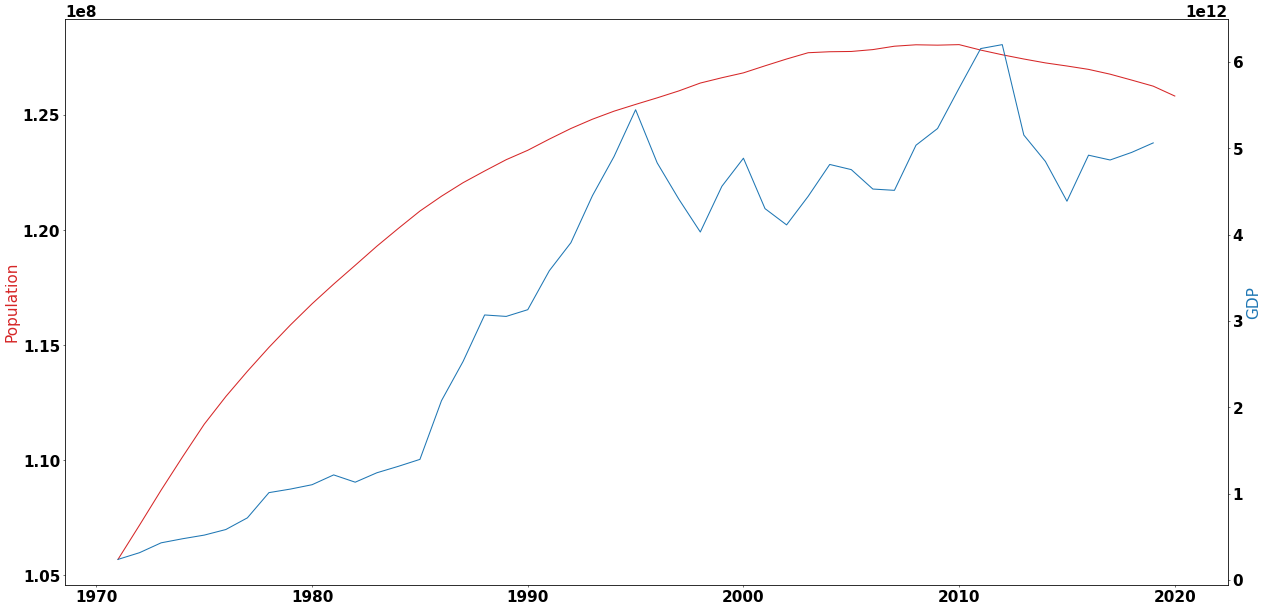

In [36]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import requests
import json

font = {'size'   : 22}

matplotlib.rc('font', **font)

headers = {"content-type": "application/json"}

fig, ax1 = plt.subplots(figsize=(30, 15), dpi=50)

urlPop = "http://api.worldbank.org/v2/country/jp/indicator/SP.POP.TOTL?format=json"
resPop = requests.get(urlPop, headers=headers)
dataListPop = resPop.json()
xpop = []
ypop = []
for data in dataListPop[1]:
  if data["value"]:
    xpop.append(int(data["date"]))
    ypop.append(int(data["value"]))
Xpop = np.array(xpop)
Ypop = np.array(ypop)

colorPop = 'tab:red'
ax1.set_ylabel('Population', color=colorPop)
ax1.plot(Xpop, Ypop, color=colorPop)

colorGdp = 'tab:blue'
ax2 = ax1.twinx()
ax2.set_ylabel('GDP', color=colorGdp)

urlGdp = "http://api.worldbank.org/v2/country/jp/indicator/NY.GDP.MKTP.CD?format=json"
resGdp = requests.get(urlGdp, headers=headers)
dataListGdp = resGdp.json()
xgdp = []
ygdp = []
for data in dataListGdp[1]:
  if data["value"]:
    xgdp.append(int(data["date"]))
    ygdp.append(int(data["value"]))
Xgdp = np.array(xgdp)
Ygdp = np.array(ygdp)

ax2.plot(Xgdp, Ygdp, color=colorGdp)

plt.show()